In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/language_translation/europarl-v10.bg-en.tsv', sep='\t', on_bad_lines='skip')
print(df)

                                                       4.  \
0       Ратифициране и прилагане на актуализирани конв...   
1       Действия, предприети вследствие резолюции на П...   
2       Двустранни споразумения между държави-членки и...   
3                   Следващата точка е общо разискване по   
4       доклада на Tadeusz Zwiefka, от името на комиси...   
...                                                   ...   
407949                              Гласуването приключи.   
407950           Колеги, имаме петдесет обяснения на вот.   
407951                        Знаете какво означава това.   
407952  Ще се движа много бързо, ще ви отнемам думата ...   
407953  Моля за извинение за това, но трябва да се при...   

                                                     4..1  \
0       The ratification and implementation of the upd...   
1       Action taken on Parliament's resolutions: see ...   
2       Bilateral agreements between Member States and...   
3                    Th

In [ ]:
df.head()

,4.,4..1,ep-09-11-26-008-04.txt,008-04,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Ратифициране и прилагане на актуализирани конв...,The ratification and implementation of the upd...,ep-09-11-26-008-04.txt,008-04,NaN,NaN,NaN,NaN
1,"Действия, предприети вследствие резолюции на П...",Action taken on Parliament's resolutions: see ...,ep-09-05-04-010.txt,010,NaN,NaN,NaN,NaN
2,Двустранни споразумения между държави-членки и...,Bilateral agreements between Member States and...,ep-09-05-06-013.txt,013,NaN,NaN,NaN,NaN
3,Следващата точка е общо разискване по,The next item is the joint debate on,ep-09-05-06-013.txt,013,352.0,Председател,NaN,NaN
4,"доклада на Tadeusz Zwiefka, от името на комиси...","the report by Tadeusz Zwiefka, on behalf of th...",ep-09-05-06-013.txt,013,352.0,Председател,NaN,NaN


In [ ]:
df.shape

(407954, 8)

In [ ]:
df.rename(columns={'4.': 'bg', '4..1': 'en'}, inplace=True)

In [ ]:
df.head()

,bg,en,ep-09-11-26-008-04.txt,008-04,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Ратифициране и прилагане на актуализирани конв...,The ratification and implementation of the upd...,ep-09-11-26-008-04.txt,008-04,NaN,NaN,NaN,NaN
1,"Действия, предприети вследствие резолюции на П...",Action taken on Parliament's resolutions: see ...,ep-09-05-04-010.txt,010,NaN,NaN,NaN,NaN
2,Двустранни споразумения между държави-членки и...,Bilateral agreements between Member States and...,ep-09-05-06-013.txt,013,NaN,NaN,NaN,NaN
3,Следващата точка е общо разискване по,The next item is the joint debate on,ep-09-05-06-013.txt,013,352.0,Председател,NaN,NaN
4,"доклада на Tadeusz Zwiefka, от името на комиси...","the report by Tadeusz Zwiefka, on behalf of th...",ep-09-05-06-013.txt,013,352.0,Председател,NaN,NaN


In [ ]:
data=df[['bg','en']]

In [ ]:
data.head()

,bg,en
0,Ратифициране и прилагане на актуализирани конв...,The ratification and implementation of the upd...
1,"Действия, предприети вследствие резолюции на П...",Action taken on Parliament's resolutions: see ...
2,Двустранни споразумения между държави-членки и...,Bilateral agreements between Member States and...
3,Следващата точка е общо разискване по,The next item is the joint debate on
4,"доклада на Tadeusz Zwiefka, от името на комиси...","the report by Tadeusz Zwiefka, on behalf of th..."


In [ ]:
data.isnull().sum()

bg    51
en    55
dtype: int64

In [ ]:
data=data.dropna()

In [ ]:
data.isnull().sum()

bg    0
en    0
dtype: int64

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq

In [ ]:
model_checkpoint = "Helsinki-NLP/opus-mt-en-bg"

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-bg")
model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-en-bg")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/791k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/999k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.33M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/305M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [ ]:
data['en'][1]

"Action taken on Parliament's resolutions: see Minutes"

In [ ]:
max_input_length = 128
max_target_length = 128

In [ ]:
type(data['en'][0])

str

In [ ]:
data.shape

(407848, 2)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df, val_df = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
train_df.head()

,bg,en
254977,"Освен това условията за получаване на кредити,...","In addition, the conditions on borrowing relat..."
4854,"Ние осъзнаваме доста добре, че социалното недо...",We are well aware that social discontent can h...
372760,"Първият е, че настоящото разискване показа, че...",The first is that this debate has demonstrated...
96175,"Все още е твърде рано да се каже, но в такъв с...","It is too soon to tell, but the timetable woul..."
79946,Ние не следва да спираме дотук.,And we should not stop there.


In [ ]:
val_df.head()

,bg,en
99841,"Второ, считаме, че думите Ви относно стратегия...","Secondly, we think your words about a crisis e..."
66152,Възможно е някои държави-членки да закъснеят.,Some Member States might be late.
181021,Поради това пътят към възможно най-тесен съюз ...,The road towards the closest possible union wi...
253497,"Гласувах в подкрепа на този документ, защото т...","I voted in favour of this document, because it..."
49244,"Важно е да подчертаем, че националните експерт...",It is important to emphasise that the national...


In [ ]:
tokenizer(["Hello, this is a sentence!", "This is another sentence."])

{'input_ids': [[857, 3, 49, 30, 19, 8298, 22, 0], [156, 30, 589, 8298, 2, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]}

In [ ]:
data['bg'][1]

'Действия, предприети вследствие резолюции на Парламента: вж. протокола'

In [ ]:
tokenizer(['Действия, предприети вследствие резолюции на Парламента: вж. протокола'])

{'input_ids': [[38, 1689, 330, 314, 279, 74, 770, 129, 3, 38, 742, 2658, 582, 742, 1084, 330, 448, 23, 279, 133, 330, 582, 279, 74, 770, 330, 38, 2658, 1110, 143, 133, 2353, 585, 71, 8, 1440, 61, 427, 216, 90, 204, 50, 46, 23, 1790, 2, 38, 742, 1489, 69, 633, 216, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [ ]:
import torch

In [ ]:
input_text = "This is a test sentence."

inputs = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True).to('cpu')

with torch.no_grad():
    outputs = model.generate(**inputs)

translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(f"Original text: {input_text}")
print(f"Translated text: {translated_text}")


Original text: This is a test sentence.
Translated text: Това е изпитателна присъда.


In [ ]:
inputs_train = tokenizer(train_df['en'].tolist(),max_length=max_target_length, padding=True, truncation=True, return_tensors="pt")
inputs_val = tokenizer(val_df['en'].tolist(),max_length=max_target_length, padding=True, truncation=True, return_tensors="pt")

In [ ]:
with tokenizer.as_target_tokenizer():
        labels_train = tokenizer(train_df['bg'].tolist(), max_length=max_target_length, padding=True, truncation=True, return_tensors="pt")
        labels_val = tokenizer(val_df['bg'].tolist(), max_length=max_target_length, padding=True, truncation=True, return_tensors="pt")

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:4016: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


In [ ]:
input_inputs_train = inputs_train['input_ids']
input_masks_train = inputs_train['attention_mask']
output_labels_train=labels_train['input_ids']
output_masks_train = labels_train['attention_mask']
input_inputs_val = inputs_val['input_ids']
input_masks_val = inputs_val['attention_mask']
output_labels_val=labels_val['input_ids']
output_masks_val = labels_val['attention_mask']

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import torch.optim as optim

In [ ]:
batch_size = 16

train_data_t = TensorDataset(input_inputs_train, input_masks_train, output_labels_train, output_masks_train)
train_sampler = RandomSampler(train_data_t)
train_dataloader = DataLoader(train_data_t, sampler=train_sampler, batch_size=batch_size)

val_data_t = TensorDataset(input_inputs_val, input_masks_val, output_labels_val, output_masks_val)
val_sampler = RandomSampler(val_data_t)
val_dataloader = DataLoader(val_data_t, sampler=val_sampler, batch_size=batch_size)

In [ ]:
optimizer = optim.AdamW(model.parameters(), lr=2e-5)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [ ]:
num_encoder_layers = len(model.model.encoder.layers)
num_decoder_layers = len(model.model.decoder.layers)

print(f'Number of encoder layers: {num_encoder_layers}')
print(f'Number of decoder layers: {num_decoder_layers}')

Number of encoder layers: 6
Number of decoder layers: 6


In [ ]:
N = 5  
for param in model.model.encoder.layers[:N]:
    for param in param.parameters():
        param.requires_grad = False

for param in model.model.decoder.layers[:N]:
    for param in param.parameters():
        param.requires_grad = False

In [ ]:
for i, layer in enumerate(model.model.encoder.layers[:6]):
    for param in layer.parameters():
        print(f"Encoder Layer {i} parameter requires_grad: {param.requires_grad}")

Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 1 parameter requires_grad: False
Encoder Layer 1 parameter requires_grad: False
Encoder Layer 1 parameter requires_grad: False
Encoder Layer 1 parameter requires_grad: False
Encoder Layer 1 parameter requires_grad: False
Encoder Layer

In [39]:
import numpy as np

model.train()
model = model.to(device)
epochs=[]
loss_values=[]
for epoch in range(15):
    total_loss=0

    for step, batch in enumerate(train_dataloader):
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels, b_label_mask  = batch
        optimizer.zero_grad()

        outputs = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_epoch_loss = total_loss / len(train_dataloader)
    loss_values.append(avg_epoch_loss)
    print(f'Epoch {epoch + 1}, Loss: {avg_epoch_loss:.4f}')

Epoch 1, Loss: 0.2200
Epoch 2, Loss: 0.1961
Epoch 3, Loss: 0.1874
Epoch 4, Loss: 0.1812
Epoch 5, Loss: 0.1764
Epoch 6, Loss: 0.1722
Epoch 7, Loss: 0.1685
Epoch 8, Loss: 0.1652
Epoch 9, Loss: 0.1622
Epoch 10, Loss: 0.1596
Epoch 11, Loss: 0.1571
Epoch 12, Loss: 0.1548
Epoch 13, Loss: 0.1527
Epoch 14, Loss: 0.1505
Epoch 15, Loss: 0.1487


In [40]:
torch.save(model.state_dict(), 'model_weights_en-bg.pth')

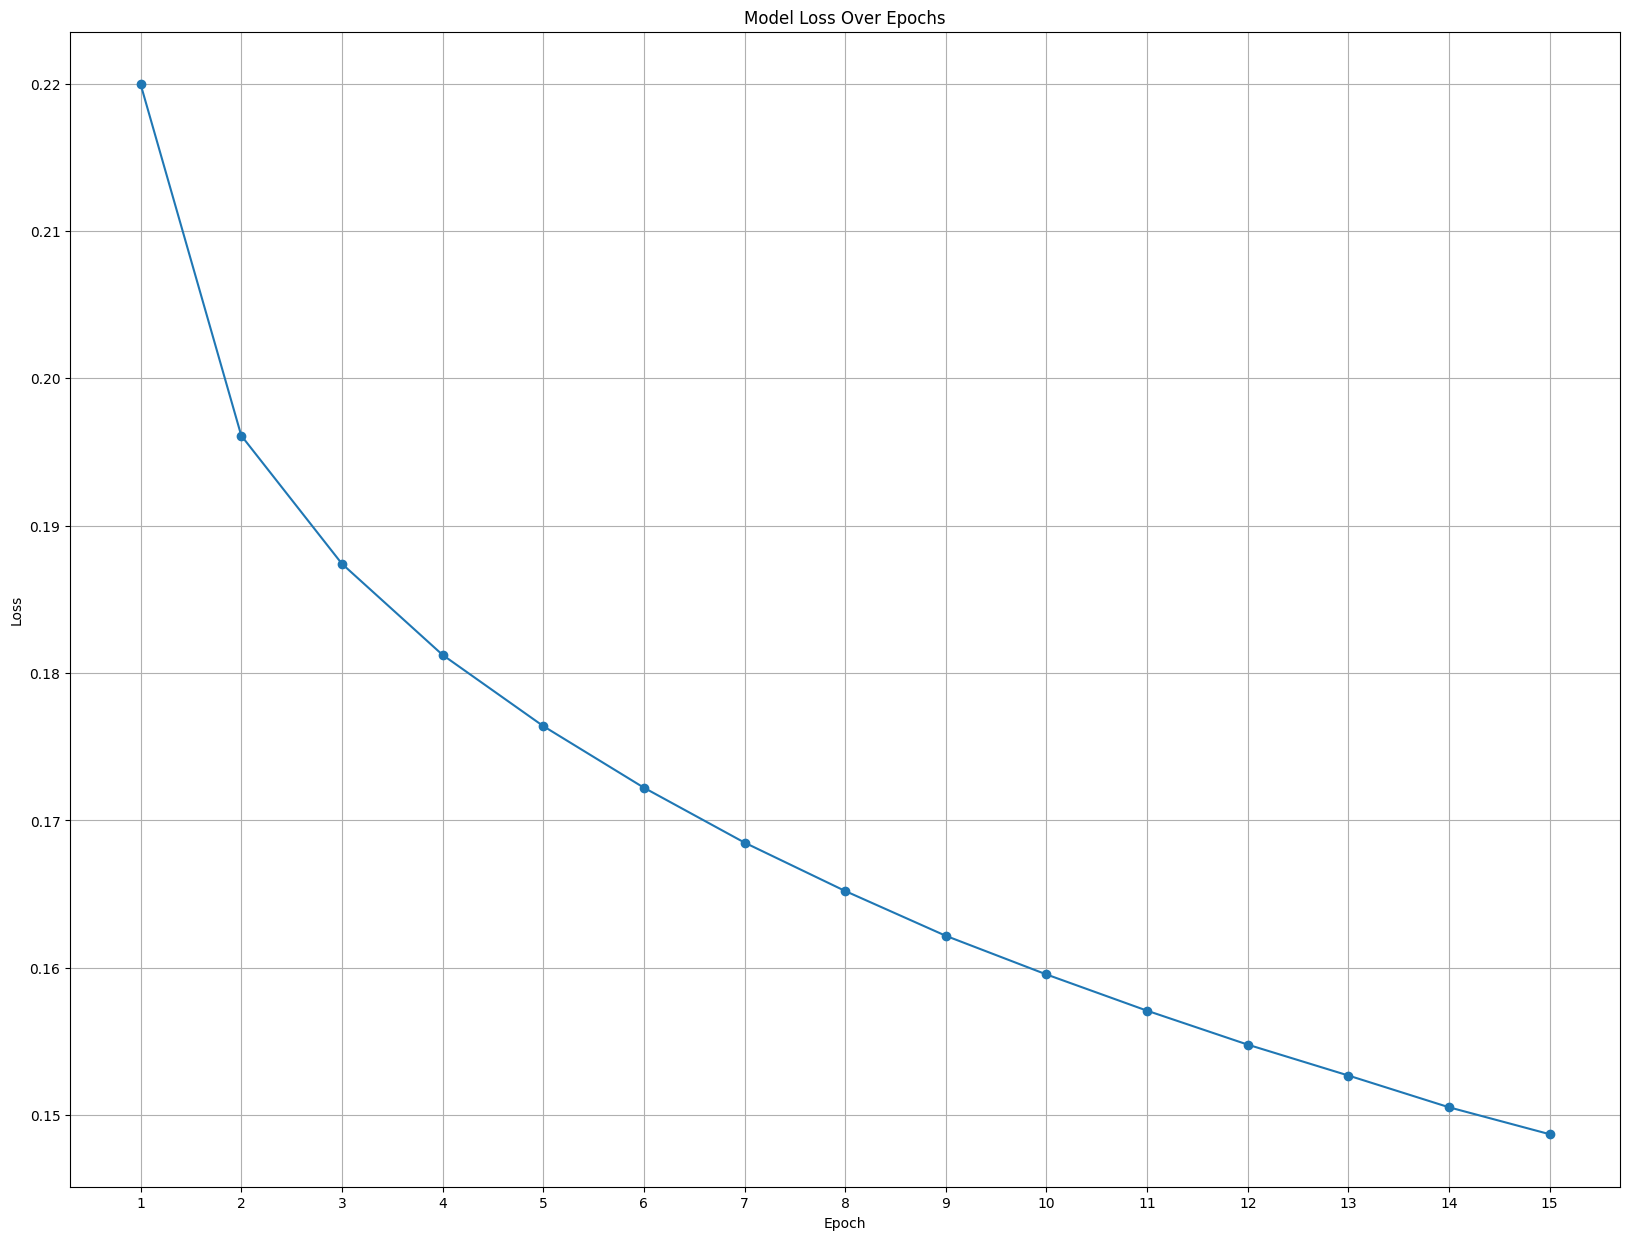

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
plt.plot(epochs, loss_values, marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.xticks(epochs)
plt.show()

In [45]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

In [48]:
print(validation_loss, bleu_score)

5.896738845429062 0.012077636438947794


In [47]:
def validate_model(model, validation_dataloader, device):
    model.eval()
    total_val_loss = 0
    references = []
    hypotheses = []
    smoothie = SmoothingFunction().method4  # Smoothing function for BLEU score

    with torch.no_grad():
        for step, batch in enumerate(validation_dataloader):
            batch = tuple(t.to(device) for t in batch)
            b_input_ids, b_input_mask, b_labels, b_label_mask = batch

            outputs = model(input_ids=b_input_ids, attention_mask=b_input_mask, labels=b_labels)
            loss = outputs.loss
            total_val_loss += loss.item()

            # Generate predictions
            generated_ids = model.generate(
                input_ids=b_input_ids,
                attention_mask=b_input_mask,
                max_length=128,  # or another appropriate max length for your use case
                num_beams=4,
                early_stopping=True
            )

            # Convert tensors to lists of token ids
            for i in range(len(generated_ids)):
                pred_sentence = generated_ids[i].tolist()
                true_sentence = b_labels[i][b_label_mask[i] == 1].tolist()

                hypotheses.append(pred_sentence)
                references.append([true_sentence])

    avg_val_loss = total_val_loss / len(validation_dataloader)
    print(f'Validation Loss: {avg_val_loss:.4f}')

    # Calculate BLEU score
    bleu_score = np.mean([sentence_bleu(ref, hyp, smoothing_function=smoothie) for ref, hyp in zip(references, hypotheses)])
    print(f'BLEU Score: {bleu_score:.4f}')

    return avg_val_loss, bleu_score

validation_loss, bleu_score = validate_model(model, val_dataloader, device)


Validation Loss: 5.8967
BLEU Score: 0.0121
